# Kmeans with Local Expension
___

In [28]:
from utils.utils import *
from utils.visualization import *
from utils.communities_network import *
from utils.iterative_greedy_algorithm import IG
from utils.kmeans import * 
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import time

In [29]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
output_animation_path = "output/animations"
algorithms_trace = []

## Test Sur Dataset Karate

In [31]:
algorithms_trace = []

### Reading data

In [32]:

file_path = 'data/reel/karate/karate.gml'
G = nx.read_gml(file_path, label='id')
original_nodes = list(G.nodes())
mapping = {node: i for i, node in enumerate(G.nodes())}
G = nx.relabel_nodes(G, mapping)
adj_matrix = nx.to_numpy_array(G)
true_labels = read_community_labels_file_reel(
    'data/reel/karate/groundTruth.txt')
print(f"The graph contains {adj_matrix.shape[0]} nodes.")

The graph contains 34 nodes.


In [33]:

start_time = time.time()
Cmax, Qmax, Kbest, Labels, trace = local_expansion_kmeans(G, adj_matrix, 2, 2 , metric="QSim")
end_time = time.time()


for item in trace:
    item["NMI"] = calc_nmi(true_labels, communities_to_labels(
        G, item["communities"], original_nodes))


new_methode_time = end_time - start_time
new_methode_modularity = Qmax
new_methode_nmi = trace[Kbest-2]["NMI"]
new_methode_nb_communities = len(Cmax)


algorithms_trace.append({"name": "Local Expansion Kmeans *", "duration": new_methode_time, "modularity": new_methode_modularity,
                        "nmi": new_methode_nmi, "nb_communities": new_methode_nb_communities})


custom_df_styling(trace) 

#### Iterated Greedy

In [ ]:

start_time = time.time()
communitites, modularity_trace, _, _ = IG(adj_matrix, 15, 0.5)
end_time = time.time()

ig_nmi = calc_nmi(true_labels, communities_to_labels(
    G, communitites, original_nodes))
ig_mod = modularity_trace[-1]
ig_time = end_time - start_time
ig_nb_communities = len(communitites)

algorithms_trace.append({"name": "IG", "duration": ig_time , "modularity":ig_mod, "nmi":ig_nmi, "nb_communities":ig_nb_communities})

IG:   0%|          | 0/15 [00:00<?, ?it/s]

#### louvain

In [ ]:
start = time.time()
partition, mod = louvain(G)
end = time.time()

louvain_nmi = calc_nmi(true_labels, partition.items())
louvain_time = end - start
louvain_mod = mod
louvain_nb_communities = len(set(partition.values()))

algorithms_trace.append({"name": "Louvain", "duration": louvain_time, "modularity": louvain_mod,
                        "nmi": louvain_nmi, "nb_communities": louvain_nb_communities})

#### kmeans++

In [ ]:
start_time = time.time()
Cmax, Qmax, Kbest, Labels, trace = kmeans_random(G, adj_matrix, 2, 10)

end_time = time.time()


for item in trace:
    item["NMI"] = calc_nmi(true_labels, communities_to_labels(
        G, item["communities"], original_nodes))

kmeans_time = end_time - start_time
kmeans_modularity = Qmax
kmeans_nmi = trace[Kbest-2]["NMI"]
kmeans_nb_communities = len(Cmax)

algorithms_trace.append({"name": "Kmeans", "duration": kmeans_time , "modularity":kmeans_modularity, "nmi":kmeans_nmi, "nb_communities":kmeans_nb_communities})

## Drawing Different Results

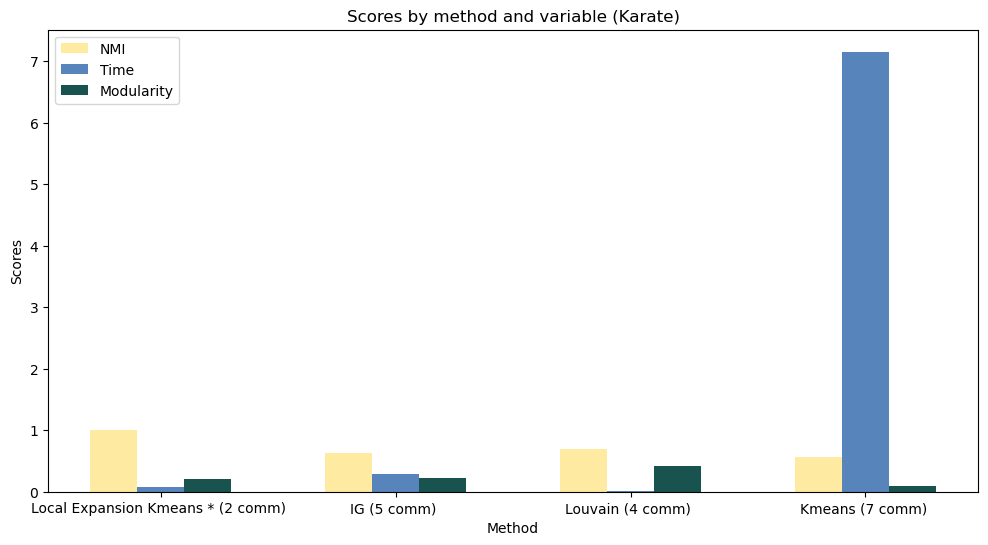

In [ ]:
# Sample data
n_groups = len(algorithms_trace)
# NMI for Louvain, IG, New Method
nmi = [algo["nmi"] for algo in algorithms_trace]
# Time for Louvain, IG, New Method
duration = [algo["duration"] for algo in algorithms_trace]
# Modularity for Louvain, IG, New Method
modularity = [algo["modularity"] for algo in algorithms_trace]

# Create plot

fig, ax = plt.subplots(figsize=(12, 6))

index = np.arange(n_groups)
bar_width = 0.2


rects1 = plt.bar(index, nmi, bar_width,
                 color='#FEEAA1',
                 label='NMI')

rects2 = plt.bar(index + bar_width, duration, bar_width,
                 color='#5784BA',
                 label='Time')

rects3 = plt.bar(index + 2 * bar_width, modularity, bar_width,
                 color='#18534F',
                 label='Modularity')


plt.xlabel('Method')
plt.ylabel('Scores')
plt.title('Scores by method and variable (Karate)')


plt.xticks(index + bar_width,
           [f"{algo['name']} ({algo['nb_communities']} comm) " for algo in algorithms_trace])

plt.legend()
plt.show()